<a href="https://colab.research.google.com/github/Rain1618/Hide-It/blob/main/model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, model_selection, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [2]:
df = pd.read_csv('/content/complete_spacy_HideIt_data.csv')

In [3]:
df = df[df['trigger'].isin(['safe', 'addiction','abuse','sexual violence', 'suicide', 'eating disorder'])]

In [ ]:
df.head()

,subreddit,trigger,token_text
0,dadjokes,safe,when i was in africa i was convinced i could s...
1,dadjokes,safe,did you know that the people in dubai do not w...
2,dadjokes,safe,frog engineering did you know a frog designed ...
3,dadjokes,safe,i got in touch with my inner self the other da...
4,dadjokes,safe,this girl asked me why i had an unlit cigarett...


In [4]:
X = df['token_text']
y = df['trigger']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
print(X_train.iloc[0])
type(X_train.iloc[0])

boredom, what to do have you ever noticed that when you have nothing pressing to do, the day never ends, but when there is a lot to accomplish the hours fly by?

any advice for boredom busters?


str

In [5]:
classes_names = ['abuse',
                 'addiction',
                 'eating disorder',
                 'safe',
                 'sexual violence',
                 'suicide']

In [ ]:
#Tfidf
Tfidf_vect = TfidfVectorizer(max_features=5000) #500, 1000, 2000, 5000
Tfidf_vect.fit(X)

TfidfVectorizer(max_features=5000)

In the case where you want to save the fitted Tfidf so that you can easily reopen it without needing to refit everything...

In [ ]:
# Save the vectorizer to a file
# with open('5000tfidf_vectorizer.pkl', 'wb') as f:
#     pickle.dump(Tfidf_vect, f)

In [6]:
with open('5000tfidf_vectorizer.pkl', 'rb') as f:
    Tfidf_vect = pickle.load(f)

In [7]:
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

###Testing difference models

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, f1_score

# Define a list of models to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
     'Random Forest': RandomForestClassifier(),
     'MultinminalNB': MultinomialNB(),
    'Linear SVC': svm.LinearSVC(random_state=42)
}

# Iterate over the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f'{model_name}: Accuracy = {accuracy}')
    print("Precision: " + str(precision))
    print("f1_score: " + str(f1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.8614206912079253
Precision: 0.8687162131952696
f1_score: 0.8516779411361804
Decision tree: Accuracy = 0.6505122143420016
Precision: 0.625131498853656
f1_score: 0.6213542322904161
Support Vector Machine: Accuracy = 0.8609703928852865
Precision: 0.8713632279848422
f1_score: 0.8520924026717823
Random Forest: Accuracy = 0.7839693797140606
Precision: 0.824994635415174
f1_score: 0.7718941026061487
MultinminalNB: Accuracy = 0.8385117640436789
Precision: 0.8426177477277914
f1_score: 0.8283172945987781
Linear SVC: Accuracy = 0.8733535967578521
Precision: 0.8717864239424123
f1_score: 0.8640506578662658


In [ ]:
model = svm.SVC(probability=True)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))


0.8609703928852865


In [ ]:
results = model.predict_proba(X_test)
results[1]

array([1.33748261e-03, 3.21616927e-03, 1.74579812e-03, 9.90566307e-01,
       8.39716025e-04, 2.29452695e-03])

In [ ]:
results[9000]

array([3.11758906e-07, 2.13699407e-07, 2.25898824e-07, 1.10113070e-07,
       2.46937404e-07, 9.99998892e-01])

In [ ]:
res = model.predict(X_test)

In [ ]:
res[9000]

'suicide'

In [ ]:
pickle.dump(model, open("SVCv2.sav", 'wb'))

In [ ]:
with open('5000SVC_proba.sav', 'rb') as f:
    model = pickle.load(f)

In [ ]:
y_pred = model.predict(X_test)

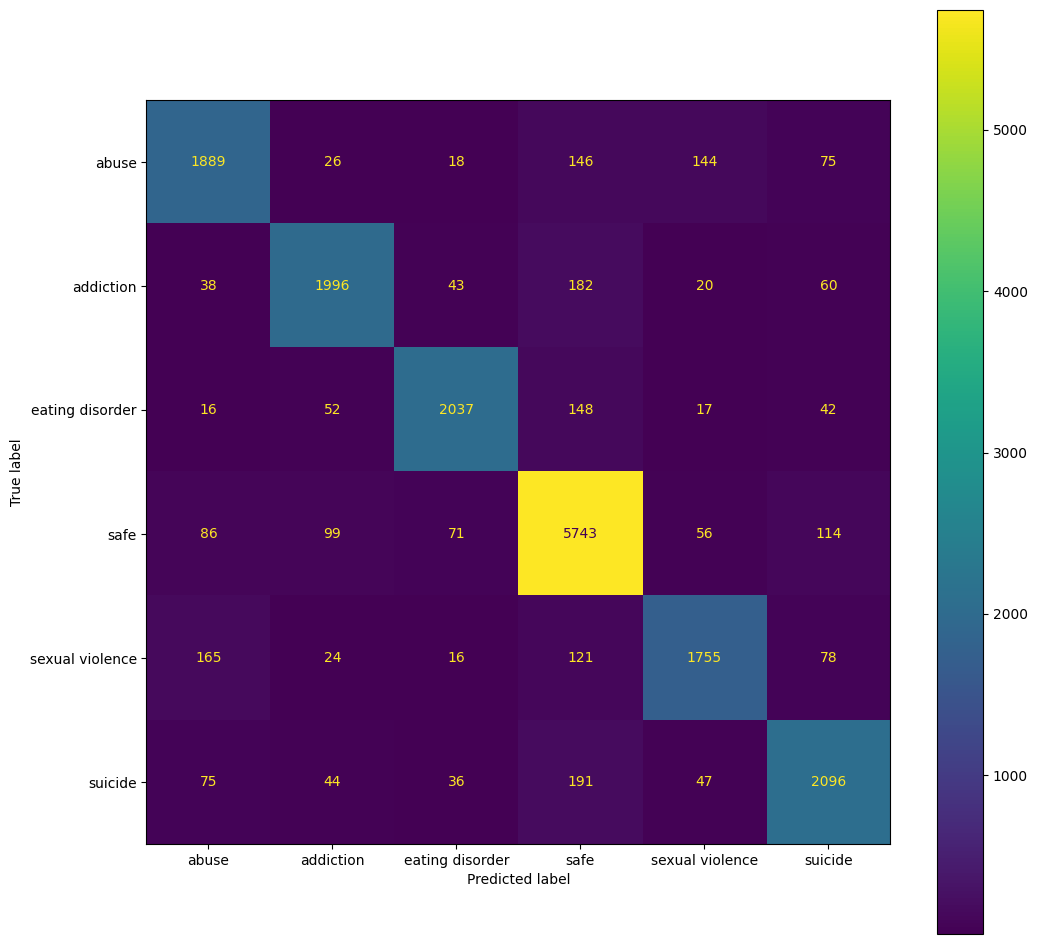

In [10]:
import matplotlib.pyplot as plt
import sklearn

fig, ax = plt.subplots(figsize=(12, 12))
x=sklearn.metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred),display_labels=classes_names)
x.plot(ax=ax)

plt.show()

In [ ]:
from sklearn.metrics import precision_score, f1_score
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:" + str(precision))
"f1_score: " + str(f1)

Precision:0.9016390972736986


'f1_score: 0.909821734412994'

In [ ]:
classification_report = metrics.classification_report(y_test, y_pred, target_names=classes_names)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)

NameError: ignored

In [ ]:
scores

array([0.78054624, 0.76707405, 0.76851186, 0.77090822, 0.78049365])

In [ ]:
import pickle
pickle.dump(clf, open("LinearSVC_model.sav", 'wb'))
print('done')

done


In [ ]:
import joblib

# Assuming your trained SVM model is stored in the variable 'svm_model'
joblib.dump(clf, 'LinearSVC_model3.joblib')

['LinearSVC_model3.joblib']

In [ ]:
import joblib
model = joblib.load('/content/LinearSVC_model2.joblib')